In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import pydot

import itertools
import networkx as nx

from scipy.stats import spearmanr
from causallearn.utils.cit import CIT

In [169]:
# total edges in complete graph
1128 * 1127 / 2

635628.0

# Remove features that are highly correlated with another

# Sure Screening for Edges in the Microbe-Microbe Interaction Network
1. Spearman
2. SparCC
3. Graphical LASSO (not sure screening, also assumes data are multivariate normal)

In [384]:
hc = pd.read_csv("../data/hc.csv")
pcos = pd.read_csv("../data/pcos.csv")

hc = hc.iloc[:, 1:]
pcos = pcos.iloc[:, 1:]

In [385]:
hc

region  01D2Z36  0319-6G20  0319-7L14  27F-1492R  37-13  67-14   A2  \
0         0      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
1         0      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
2         0      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
3         0      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
4         0      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
..      ...      ...        ...        ...        ...    ...    ...  ...   
430       1      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
431       1      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
432       1      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   
433       1      0.0   0.008537        0.0        0.0    0.0    0.0  0.0   
434       1      0.0   0.000000        0.0        0.0    0.0    0.0  0.0   

     Abiotrophia  Absconditabacteriales_(SR1)  ...  Xanthomonas  Xenorhabdus  \
0            0.0                     0.019341  ...          0.0          0.0   
1            0.0                     0.000000  ...          0.0          0.0   
2            0.0                     0.000000  ...          0.0          0.0   
3            0.0                     0.010694  ...          0.0          0.0   
4            0.0                     0.000000  ...          0.0          0.0   
..           ...                          ...  ...          ...          ...   
430          0.0                     0.000000  ...          0.0          0.0   
431          0.0                     0.000000  ...          0.0          0.0   
432          0.0                     0.000000  ...          0.0          0.0   
433          0.0                     0.000000  ...          0.0          0.0   
434          0.0                     0.000000  ...          0.0          0.0   

     Xylanibacillus  Yersinia  Youngiibacter  Zavarzinia  Zoogloea  ZOR0006  \
0               0.0       0.0            0.0         0.0       0.0      0.0   
1               0.0       0.0            0.0         0.0       0.0      0.0   
2               0.0       0.0            0.0         0.0       0.0      0.0   
3               0.0       0.0            0.0         0.0       0.0      0.0   
4               0.0       0.0            0.0         0.0       0.0      0.0   
..              ...       ...            ...         ...       ...      ...   
430             0.0       0.0            0.0         0.0       0.0      0.0   
431             0.0       0.0            0.0         0.0       0.0      0.0   
432             0.0       0.0            0.0         0.0       0.0      0.0   
433             0.0       0.0            0.0         0.0       0.0      0.0   
434             0.0       0.0            0.0         0.0       0.0      0.0   

     Unclassified  study_site  
0        3.640935           1  
1        7.630561           1  
2        7.448002           1  
3        6.459400           1  
4        7.031991           1  
..            ...         ...  
430      3.460715          14  
431      2.002069          14  
432      2.570265          14  
433      1.438480          14  
434      3.901689          14  

[435 rows x 1129 columns]

In [386]:
pcos

region  01D2Z36  0319-6G20  0319-7L14  27F-1492R  37-13  67-14   A2  \
0         0      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
1         0      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
2         0      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
3         0      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
4         0      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
..      ...      ...        ...        ...        ...    ...    ...  ...   
508       1      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
509       1      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
510       1      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
511       1      0.0        0.0        0.0        0.0    0.0    0.0  0.0   
512       1      0.0        0.0        0.0        0.0    0.0    0.0  0.0   

     Abiotrophia  Absconditabacteriales_(SR1)  ...  Xanthomonas  Xenorhabdus  \
0       0.000000                          0.0  ...          0.0          0.0   
1       0.000000                          0.0  ...          0.0          0.0   
2       0.000000                          0.0  ...          0.0          0.0   
3       0.000000                          0.0  ...          0.0          0.0   
4       0.000000                          0.0  ...          0.0          0.0   
..           ...                          ...  ...          ...          ...   
508     0.009899                          0.0  ...          0.0          0.0   
509     0.000000                          0.0  ...          0.0          0.0   
510     0.000000                          0.0  ...          0.0          0.0   
511     0.050805                          0.0  ...          0.0          0.0   
512     0.000000                          0.0  ...          0.0          0.0   

     Xylanibacillus  Yersinia  Youngiibacter  Zavarzinia  Zoogloea  ZOR0006  \
0               0.0       0.0            0.0         0.0       0.0      0.0   
1               0.0       0.0            0.0         0.0       0.0      0.0   
2               0.0       0.0            0.0         0.0       0.0      0.0   
3               0.0       0.0            0.0         0.0       0.0      0.0   
4               0.0       0.0            0.0         0.0       0.0      0.0   
..              ...       ...            ...         ...       ...      ...   
508             0.0       0.0            0.0         0.0       0.0      0.0   
509             0.0       0.0            0.0         0.0       0.0      0.0   
510             0.0       0.0            0.0         0.0       0.0      0.0   
511             0.0       0.0            0.0         0.0       0.0      0.0   
512             0.0       0.0            0.0         0.0       0.0      0.0   

     Unclassified  study_site  
0        3.913396           1  
1        1.562529           1  
2        3.621856           1  
3        4.907943           1  
4        5.737178           1  
..            ...         ...  
508     25.423813          14  
509      3.704500          14  
510      1.894488          14  
511      0.111772          14  
512      2.553967          14  

[513 rows x 1129 columns]

## 1. Spearman on PCOS

In [172]:
hc_adj = np.full((hc.shape[1], hc.shape[1]), 0)
pcos_adj = np.full((pcos.shape[1], pcos.shape[1]), 0)

bonf = hc.shape[1] * hc.shape[1] // 2 # correct by number of unique tests

for i in range(hc.shape[1]):
    print(hc.columns[i])
    for j in range(i, hc.shape[1]):
        hc_corr = spearmanr(hc.iloc[:, i], hc.iloc[:, j])
        pcos_corr = spearmanr(pcos.iloc[:, i], pcos.iloc[:, j])
        if hc_corr[1] < 0.05 / bonf:
            hc_adj[i, j] = 1
        if pcos_corr[1] < 0.05 / bonf:
            pcos_adj[i, j] = 1

hc_adj = hc_adj - np.eye(hc.shape[1])
pcos_adj = pcos_adj - np.eye(pcos.shape[1])

region


/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_63446/304520813.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  hc_corr = spearmanr(hc.iloc[:, i], hc.iloc[:, j])
/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_63446/304520813.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcos_corr = spearmanr(pcos.iloc[:, i], pcos.iloc[:, j])


01D2Z36
0319-6G20
0319-7L14
27F-1492R
37-13
67-14
A2
Abiotrophia
Absconditabacteriales_(SR1)
Abyssivirga
Acetanaerobacterium
Acetatifactor
Acetitomaculum
Acetivibrio
Acetoanaerobium
Acetobacter
Acetobacterium
Acholeplasma
Acidaminobacter
Acidaminococcus
Acidibacter
Acidipila
Acidothermus
Acidovorax
Acinetobacter
Actinobacillus
Actinomyces
Actinophytocola
Actinospica
Acutalibacter
AD3
Adhaeribacter
Adlercreutzia
Aerococcus
Aeromicrobium
Aeromonas
Agathobacter
Agathobaculum
Aggregatibacter
Agrilactobacillus
Agrobacterium
Agromyces
AKIW781
Akkermansia
AKYG1722
AKYH767
Alcanivorax
Alicyclobacillus
Aliihoeflea
Aliikangiella
Alishewanella
Alistipes
Alkalibacterium
Alkalibaculum
Alkalicoccus
Alkalihalobacillus
Alkaliphilus
Allisonella
Allobaculum
Alloprevotella
Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium
Alloscardovia
Altererythrobacter
Alteribacillus
Alterileibacterium
Amedibacillus
Amedibacterium
Aminicella
Aminicenantales
Aminipila
Ammoniibacillus
Ammoniphilus
Amphibacillus
Amphorel

In [181]:
hc_adj.sum()

np.float64(174515.0)

In [180]:
pcos_adj.sum()

np.float64(180601.0)

## 2. SparCC on PCOS

How to use SparCC:
1. Update the `configuration.yml` file
2. Run `python General_Execution.py`

In [389]:
def get_significant_cor_pairs(sparcc_fp, sparcc_pval_fp):
    sparcc = pd.read_csv(sparcc_fp)
    sparcc = sparcc.iloc[:, 1:]
    sparcc.columns = pcos.columns[:-1]

    sparcc_pval = pd.read_csv(sparcc_pval_fp)
    sparcc_pval = sparcc_pval.iloc[:, 1:]
    sparcc_pval.columns = pcos.columns[:-1]

    sparcc_genus_A, sparcc_genus_B, sparcc_rho, sparcc_p = [], [], [], []
    
    for i in range(sparcc_pval.shape[1]):
        for j in range(i, sparcc_pval.shape[1]):
            if sparcc_pval.iloc[i, j] <= 0.05:
                sparcc_genus_A.append(sparcc_pval.columns[i])
                sparcc_genus_B.append(sparcc_pval.columns[j])
                sparcc_rho.append(sparcc.iloc[i, j])
                sparcc_p.append(sparcc_pval.iloc[i, j])

    sparcc_sig = pd.DataFrame(data = {'genus_A': sparcc_genus_A,
                                      'genus_B': sparcc_genus_B,
                                      'rho': sparcc_rho,
                                      'p': sparcc_p})
    return sparcc_sig

In [390]:
get_significant_cor_pairs("../../hc_sparcc.csv", "../../hc_pvals_one_sided.csv").to_csv("sparcc_hc_screened.csv")

In [391]:
get_significant_cor_pairs("../../pcos_sparcc.csv", "../../pcos_pvals_one_sided.csv").to_csv("sparcc_pcos_screened.csv")

## 3. Graphical LASSO

In [336]:
# read in GLASSO sparse inverse covariance matrix
GLASSO_hc = pd.read_csv("../src/GLASSO_hc.csv")
GLASSO_hc.columns = hc.columns[1:]
GLASSO_pcos = pd.read_csv("../src/GLASSO_pcos.csv")
GLASSO_pcos.columns = pcos.columns[1:]
GLASSO_hc

01D2Z36  0319-6G20  0319-7L14  27F-1492R  37-13  67-14   A2  \
0     0.444749        0.0        0.0        0.0    0.0    0.0  0.0   
1     0.000000        0.5        0.0        0.0    0.0    0.0  0.0   
2     0.000000        0.0        0.5        0.0    0.0    0.0  0.0   
3     0.000000        0.0        0.0        0.5    0.0    0.0  0.0   
4     0.000000        0.0        0.0        0.0    0.5    0.0  0.0   
...        ...        ...        ...        ...    ...    ...  ...   
1123  0.000000        0.0        0.0        0.0    0.0    0.0  0.0   
1124  0.000000        0.0        0.0        0.0    0.0    0.0  0.0   
1125  0.000000        0.0        0.0        0.0    0.0    0.0  0.0   
1126  0.000000        0.0        0.0        0.0    0.0    0.0  0.0   
1127  0.000000        0.0        0.0        0.0    0.0    0.0  0.0   

      Abiotrophia  Absconditabacteriales_(SR1)  Abyssivirga  ...  Xanthomonas  \
0             0.0                          0.0          0.0  ...          0.0   
1             0.0                          0.0          0.0  ...          0.0   
2             0.0                          0.0          0.0  ...          0.0   
3             0.0                          0.0          0.0  ...          0.0   
4             0.0                          0.0          0.0  ...          0.0   
...           ...                          ...          ...  ...          ...   
1123          0.0                          0.0          0.0  ...          0.0   
1124          0.0                          0.0          0.0  ...          0.0   
1125          0.0                          0.0          0.0  ...          0.0   
1126          0.0                          0.0          0.0  ...          0.0   
1127          0.0                          0.0          0.0  ...          0.0   

      Xenorhabdus  Xylanibacillus  Yersinia  Youngiibacter  Zavarzinia  \
0             0.0             0.0       0.0            0.0         0.0   
1             0.0             0.0       0.0            0.0         0.0   
2             0.0             0.0       0.0            0.0         0.0   
3             0.0             0.0       0.0            0.0         0.0   
4             0.0             0.0       0.0            0.0         0.0   
...           ...             ...       ...            ...         ...   
1123          0.0             0.0       0.0            0.0         0.5   
1124          0.0             0.0       0.0            0.0         0.0   
1125          0.0             0.0       0.0            0.0         0.0   
1126          0.0             0.0       0.0            0.0         0.0   
1127          0.0             0.0       0.0            0.0         0.0   

      Zoogloea  ZOR0006  Unclassified  study_site  
0          0.0      0.0           0.0    0.000000  
1          0.0      0.0           0.0    0.000000  
2          0.0      0.0           0.0    0.000000  
3          0.0      0.0           0.0    0.000000  
4          0.0      0.0           0.0    0.000000  
...        ...      ...           ...         ...  
1123       0.0      0.0           0.0    0.000000  
1124       0.5      0.0           0.0    0.000000  
1125       0.0      0.5           0.0    0.000000  
1126       0.0      0.0           0.5    0.000000  
1127       0.0      0.0           0.0    0.029879  

[1128 rows x 1128 columns]

In [337]:
# get microbe pairs (edges) with nonzero covariance
keep_nodes_hc = set()
keep_nodes_pcos = set()

GLASSO_hc_genus_A, GLASSO_hc_genus_B, GLASSO_hc_prec = [], [], []
GLASSO_pcos_genus_A, GLASSO_pcos_genus_B, GLASSO_pcos_prec = [], [], []

for i in range(GLASSO_hc.shape[1]-1):
    for j in range(i+1, GLASSO_hc.shape[1]):
        if GLASSO_hc.iloc[i, j] != 0:
            keep_nodes_hc.add(GLASSO_hc.columns[i])
            keep_nodes_hc.add(GLASSO_hc.columns[j])
            GLASSO_hc_genus_A.append(GLASSO_hc.columns[i])
            GLASSO_hc_genus_B.append(GLASSO_hc.columns[j])
            GLASSO_hc_prec.append(GLASSO_hc.iloc[i, j])
        if GLASSO_pcos.iloc[i, j] != 0:
            keep_nodes_pcos.add(GLASSO_pcos.columns[i])
            keep_nodes_pcos.add(GLASSO_pcos.columns[j])
            GLASSO_pcos_genus_A.append(GLASSO_pcos.columns[i])
            GLASSO_pcos_genus_B.append(GLASSO_pcos.columns[j])
            GLASSO_pcos_prec.append(GLASSO_pcos.iloc[i, j])

keep_nodes_hc = sorted(list(keep_nodes_hc))
# keep_nodes_hc = [keep_nodes_hc[-1]] + keep_nodes_hc[:-1]
hc_short = hc[keep_nodes_hc]

GLASSO_hc = pd.DataFrame(data = {'genus_A': GLASSO_hc_genus_A,
                                 'genus_B': GLASSO_hc_genus_B,
                                 'precision': GLASSO_hc_prec})

keep_nodes_pcos = sorted(list(keep_nodes_pcos))
# keep_nodes_pcos = [keep_nodes_pcos[-1]] + keep_nodes_pcos[:-1]
pcos_short = pcos[keep_nodes_pcos]

GLASSO_pcos = pd.DataFrame(data = {'genus_A': GLASSO_pcos_genus_A,
                                   'genus_B': GLASSO_pcos_genus_B,
                                   'precision': GLASSO_pcos_prec})

In [338]:
GLASSO_hc

genus_A                                     genus_B  \
0                       01D2Z36                  Prevotellaceae_Ga6A1_group   
1                Acetitomaculum  Burkholderia-Caballeronia-Paraburkholderia   
2                 Agathobaculum             Bacteroides_pectinophilus_group   
3                 Agathobaculum  Burkholderia-Caballeronia-Paraburkholderia   
4                 Agathobaculum                                      Phocea   
..                          ...                                         ...   
163  Prevotellaceae_Ga6A1_group                                     UCG-007   
164  Prevotellaceae_Ga6A1_group                                  study_site   
165                  Roseateles                                  study_site   
166                  Roseivirga                                     UCG-003   
167                 Subgroup_10                                     UCG-003   

     precision  
0     0.000242  
1    -0.005015  
2     0.000353  
3     0.001038  
4     0.000047  
..         ...  
163   0.000490  
164   0.001965  
165  -0.002409  
166   0.000506  
167  -0.001381  

[168 rows x 3 columns]

In [339]:
GLASSO_pcos

genus_A                          genus_B  precision
0                Actinobacillus                        Aeromonas  -0.003206
1                Actinobacillus                      Duncaniella  -0.002891
2                     Aeromonas                    Agathobaculum   0.000852
3                     Aeromonas  Bacteroides_pectinophilus_group   0.001671
4                     Aeromonas                        Bilophila   0.000954
..                          ...                              ...        ...
166  Prevotellaceae_Ga6A1_group                     Streptomyces   0.000181
167  Prevotellaceae_Ga6A1_group                      Subgroup_10   0.002260
168  Prevotellaceae_Ga6A1_group                            SWB02  -0.001857
169  Prevotellaceae_Ga6A1_group                          UCG-003   0.000738
170  Prevotellaceae_Ga6A1_group                       study_site   0.003541

[171 rows x 3 columns]

In [340]:
hc_short

01D2Z36  Acetitomaculum  Agathobaculum  Alkalibacterium  \
0        0.0             0.0            0.0              0.0   
1        0.0             0.0            0.0              0.0   
2        0.0             0.0            0.0              0.0   
3        0.0             0.0            0.0              0.0   
4        0.0             0.0            0.0              0.0   
..       ...             ...            ...              ...   
430      0.0             0.0            0.0              0.0   
431      0.0             0.0            0.0              0.0   
432      0.0             0.0            0.0              0.0   
433      0.0             0.0            0.0              0.0   
434      0.0             0.0            0.0              0.0   

     Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium  Anaerocolumna  \
0                                                  0.0             0.0   
1                                                  0.0             0.0   
2                                                  0.0             0.0   
3                                                  0.0             0.0   
4                                                  0.0             0.0   
..                                                 ...             ...   
430                                                0.0             0.0   
431                                                0.0             0.0   
432                                                0.0             0.0   
433                                                0.0             0.0   
434                                                0.0             0.0   

     Anaerotaenia  Bacteroides_pectinophilus_group  Bilophila  Blfdi19  ...  \
0             0.0                              0.0   0.072529      0.0  ...   
1             0.0                              0.0   0.142650      0.0  ...   
2             0.0                              0.0   0.067047      0.0  ...   
3             0.0                              0.0   0.000000      0.0  ...   
4             0.0                              0.0   0.000000      0.0  ...   
..            ...                              ...        ...      ...  ...   
430           0.0                              0.0   0.000000      0.0  ...   
431           0.0                              0.0   0.027384      0.0  ...   
432           0.0                              0.0   0.050596      0.0  ...   
433           0.0                              0.0   0.032014      0.0  ...   
434           0.0                              0.0   0.100272      0.0  ...   

     Roseivirga  Ruminococcus2  Ruminococcus_gauvreauii_group  SWB02  \
0           0.0            0.0                       0.186157    0.0   
1           0.0            0.0                       0.000000    0.0   
2           0.0            0.0                       0.029151    0.0   
3           0.0            0.0                       0.045833    0.0   
4           0.0            0.0                       0.147228    0.0   
..          ...            ...                            ...    ...   
430         0.0            0.0                       0.065165    0.0   
431         0.0            0.0                       0.033469    0.0   
432         0.0            0.0                       0.000000    0.0   
433         0.0            0.0                       0.070430    0.0   
434         0.0            0.0                       0.104728    0.0   

     Streptomyces  Subgroup_10  Sulfuricurvum   UCG-003  UCG-007  study_site  
0             0.0          0.0            0.0  0.055605      0.0           1  
1             0.0          0.0            0.0  0.198259      0.0           1  
2             0.0          0.0            0.0  0.192395      0.0           1  
3             0.0          0.0            0.0  0.465969      0.0           1  
4             0.0          0.0            0.0  0.416729      0.0           1  
..            ...          ...            ...       ...    

In [341]:
pcos_short

AKYG1722  Actinobacillus  Aeromonas  Agathobaculum  Alkalibacterium  \
0         0.0             0.0        0.0            0.0              0.0   
1         0.0             0.0        0.0            0.0              0.0   
2         0.0             0.0        0.0            0.0              0.0   
3         0.0             0.0        0.0            0.0              0.0   
4         0.0             0.0        0.0            0.0              0.0   
..        ...             ...        ...            ...              ...   
508       0.0             0.0        0.0            0.0              0.0   
509       0.0             0.0        0.0            0.0              0.0   
510       0.0             0.0        0.0            0.0              0.0   
511       0.0             0.0        0.0            0.0              0.0   
512       0.0             0.0        0.0            0.0              0.0   

     Anaerocolumna  Anaerotaenia  Aquicella  Bacteroides_pectinophilus_group  \
0              0.0           0.0        0.0                              0.0   
1              0.0           0.0        0.0                              0.0   
2              0.0           0.0        0.0                              0.0   
3              0.0           0.0        0.0                              0.0   
4              0.0           0.0        0.0                              0.0   
..             ...           ...        ...                              ...   
508            0.0           0.0        0.0                              0.0   
509            0.0           0.0        0.0                              0.0   
510            0.0           0.0        0.0                              0.0   
511            0.0           0.0        0.0                              0.0   
512            0.0           0.0        0.0                              0.0   

     Bdellovibrio  ...  Roseivirga  Ruminococcus2  \
0             0.0  ...         0.0            0.0   
1             0.0  ...         0.0            0.0   
2             0.0  ...         0.0            0.0   
3             0.0  ...         0.0            0.0   
4             0.0  ...         0.0            0.0   
..            ...  ...         ...            ...   
508           0.0  ...         0.0            0.0   
509           0.0  ...         0.0            0.0   
510           0.0  ...         0.0            0.0   
511           0.0  ...         0.0            0.0   
512           0.0  ...         0.0            0.0   

     Ruminococcus_gauvreauii_group  Ruminococcus_torques_group  SWB02  \
0                         0.152111                    0.158037    0.0   
1                         0.000000                    0.000000    0.0   
2                         0.000000                    9.465326    0.0   
3                         0.000000                    0.658187    0.0   
4                         0.387988                    0.266312    0.0   
..                             ...                         ...    ...   
508                       0.059396                    1.559136    0.0   
509                       0.052754                    0.566617    0.0   
510                       0.000000                    2.922235    0.0   
511                       0.000000                    0.013548    0.0   
512                       0.000000                    0.107455    0.0   

     Streptococcus  Streptomyces  Subgroup_10   UCG-003  study_site  
0         0.065190           0.0          0.0  0.140258           1  
1         0.311042           0.0          0.0  0.000000           1  
2         0.545625           0.0          0.0  0.131028           1  
3         0.019568           0.0          0.0  0.000000           1  
4         0.211213           0.0          0.0  0.000000           1  
..             ...           ...          ...       ...         ...  
508      13.584280           0.0          0.0  0.274705          14  
509       0.656494           0.0          0.0  0.000000  

In [342]:
len(np.unique(np.concatenate((GLASSO_hc['genus_A'].unique(),  GLASSO_hc['genus_B'].unique()))))

65

In [343]:
len(np.unique(np.concatenate((GLASSO_pcos['genus_A'].unique(),  GLASSO_pcos['genus_B'].unique()))))

64

In [251]:
GLASSO_hc.to_csv("glasso_hc_screened.csv")

In [252]:
GLASSO_pcos.to_csv("glasso_pcos_screened.csv")

In [164]:
1128 * 1127 / 2

635628.0

# Run our algorithm
Please make sure to run the last cell first!

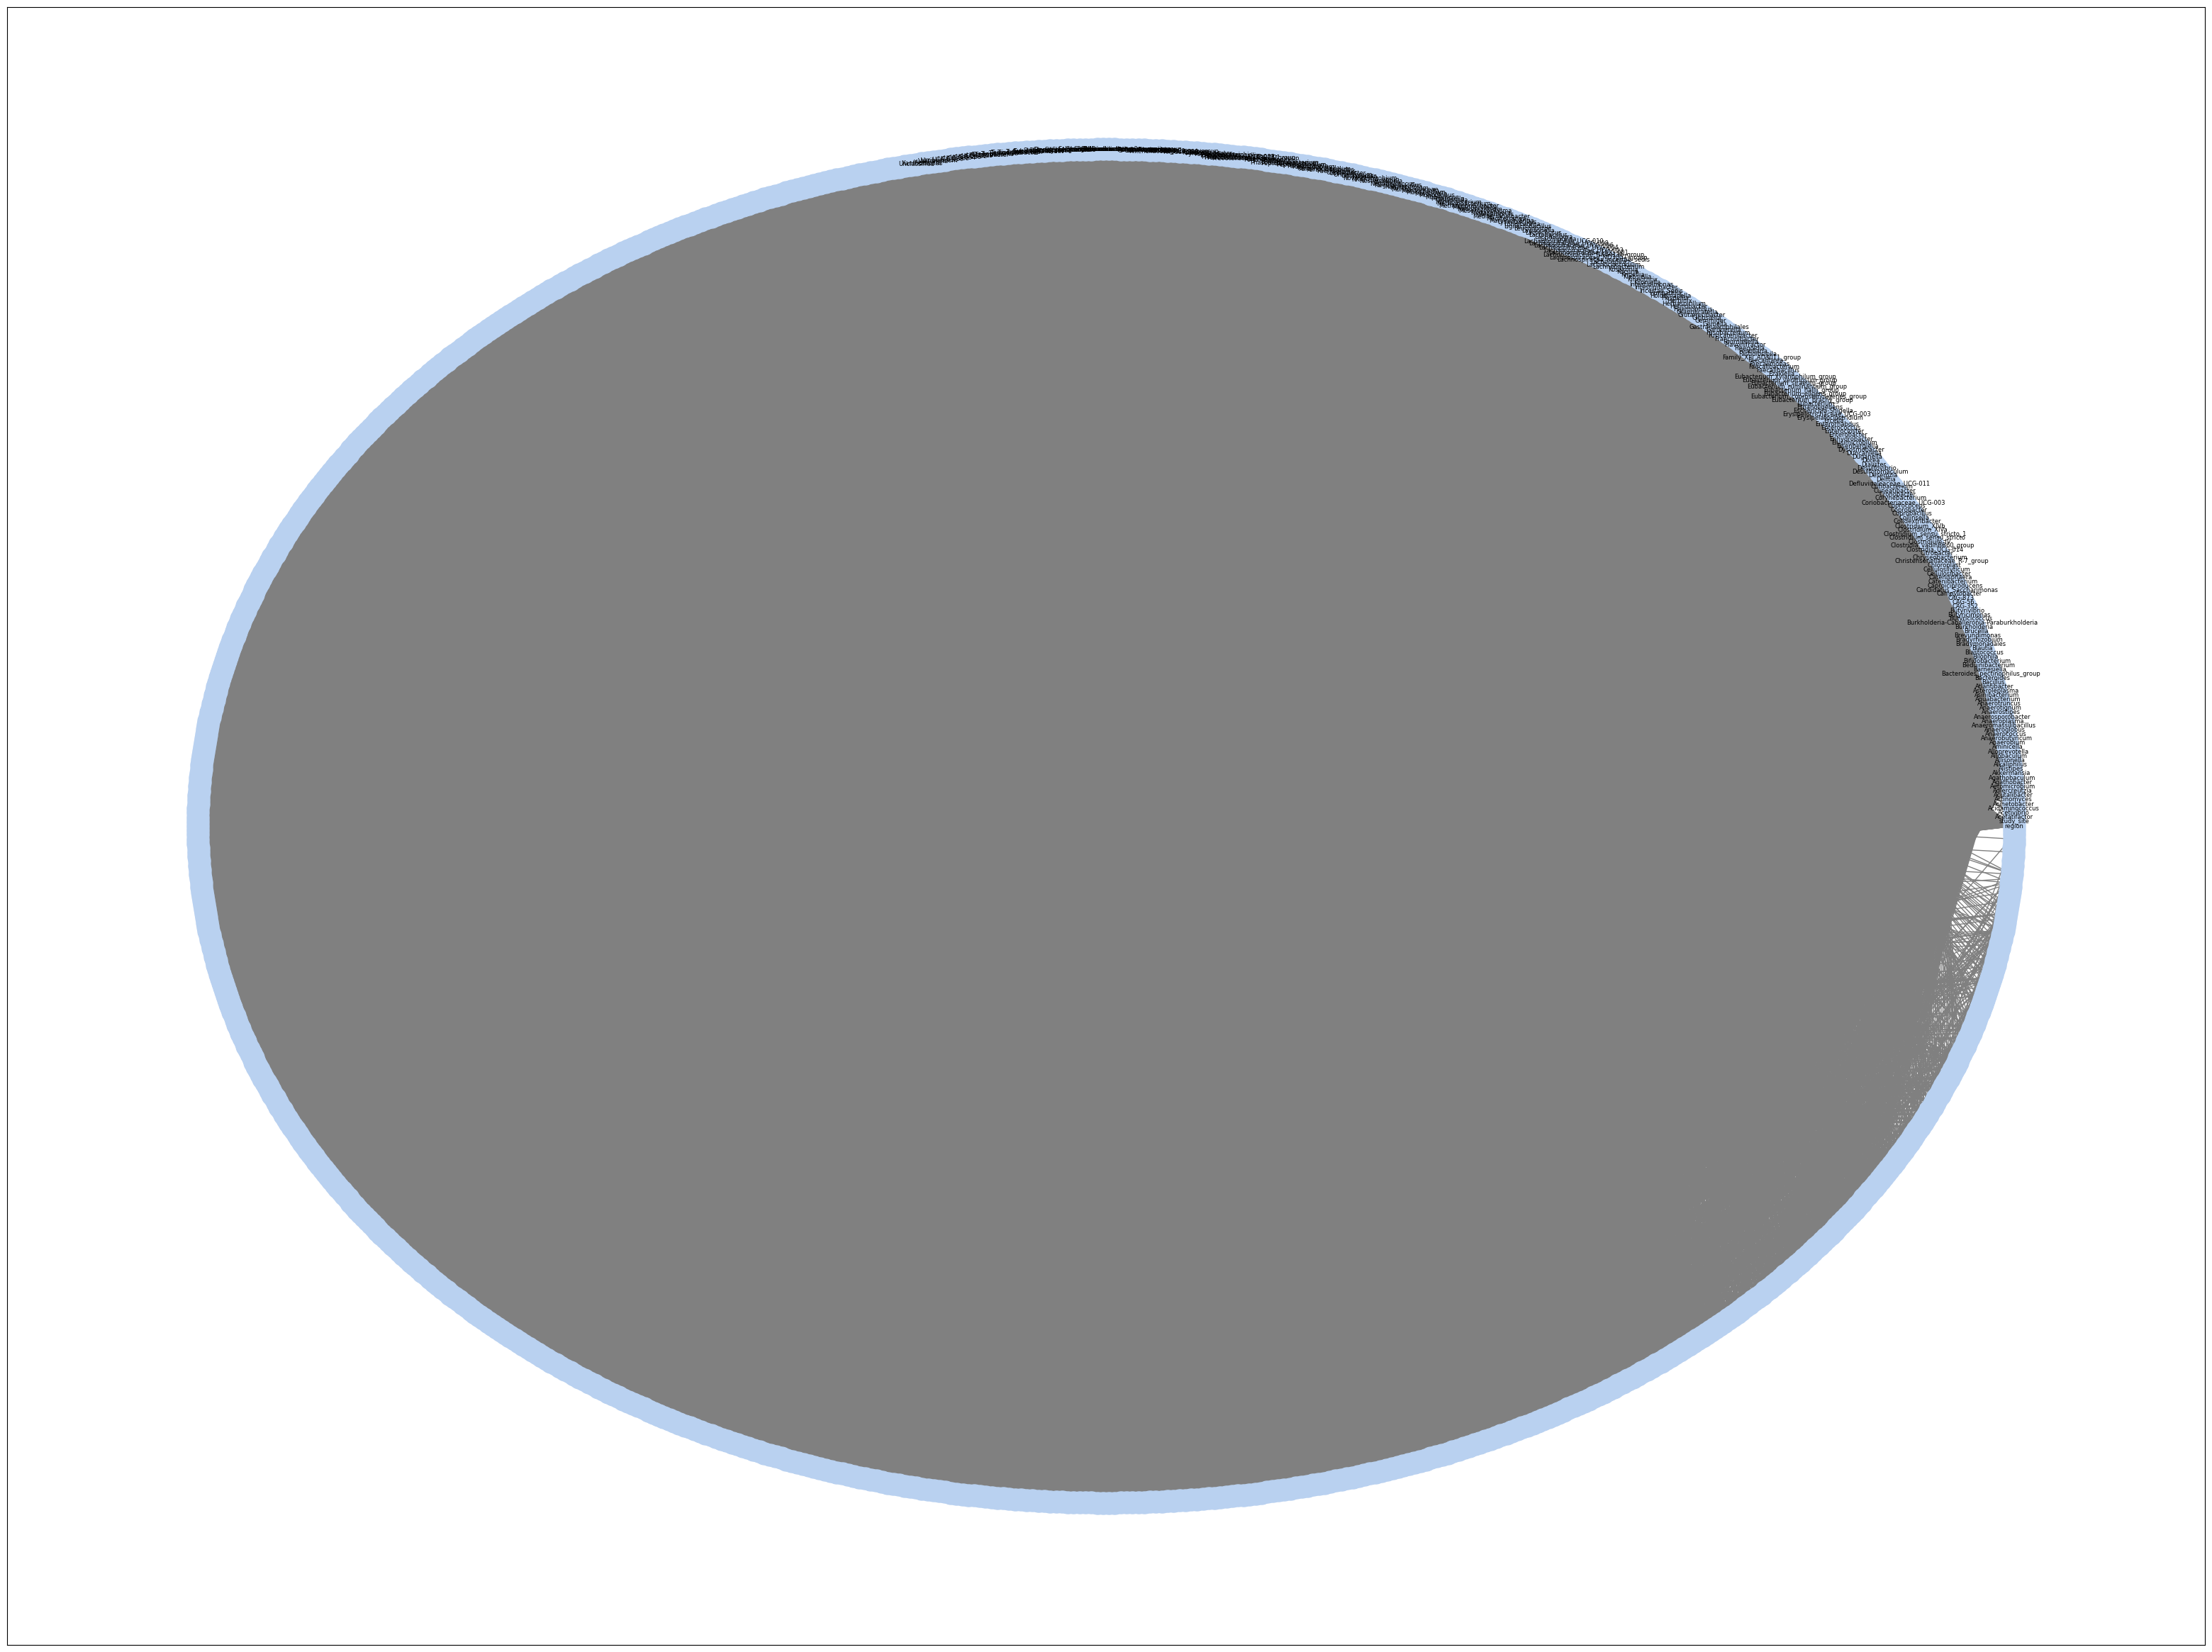

In [408]:
graph_networkx(hc_adj, list(hc.columns), 'spearman_HC')

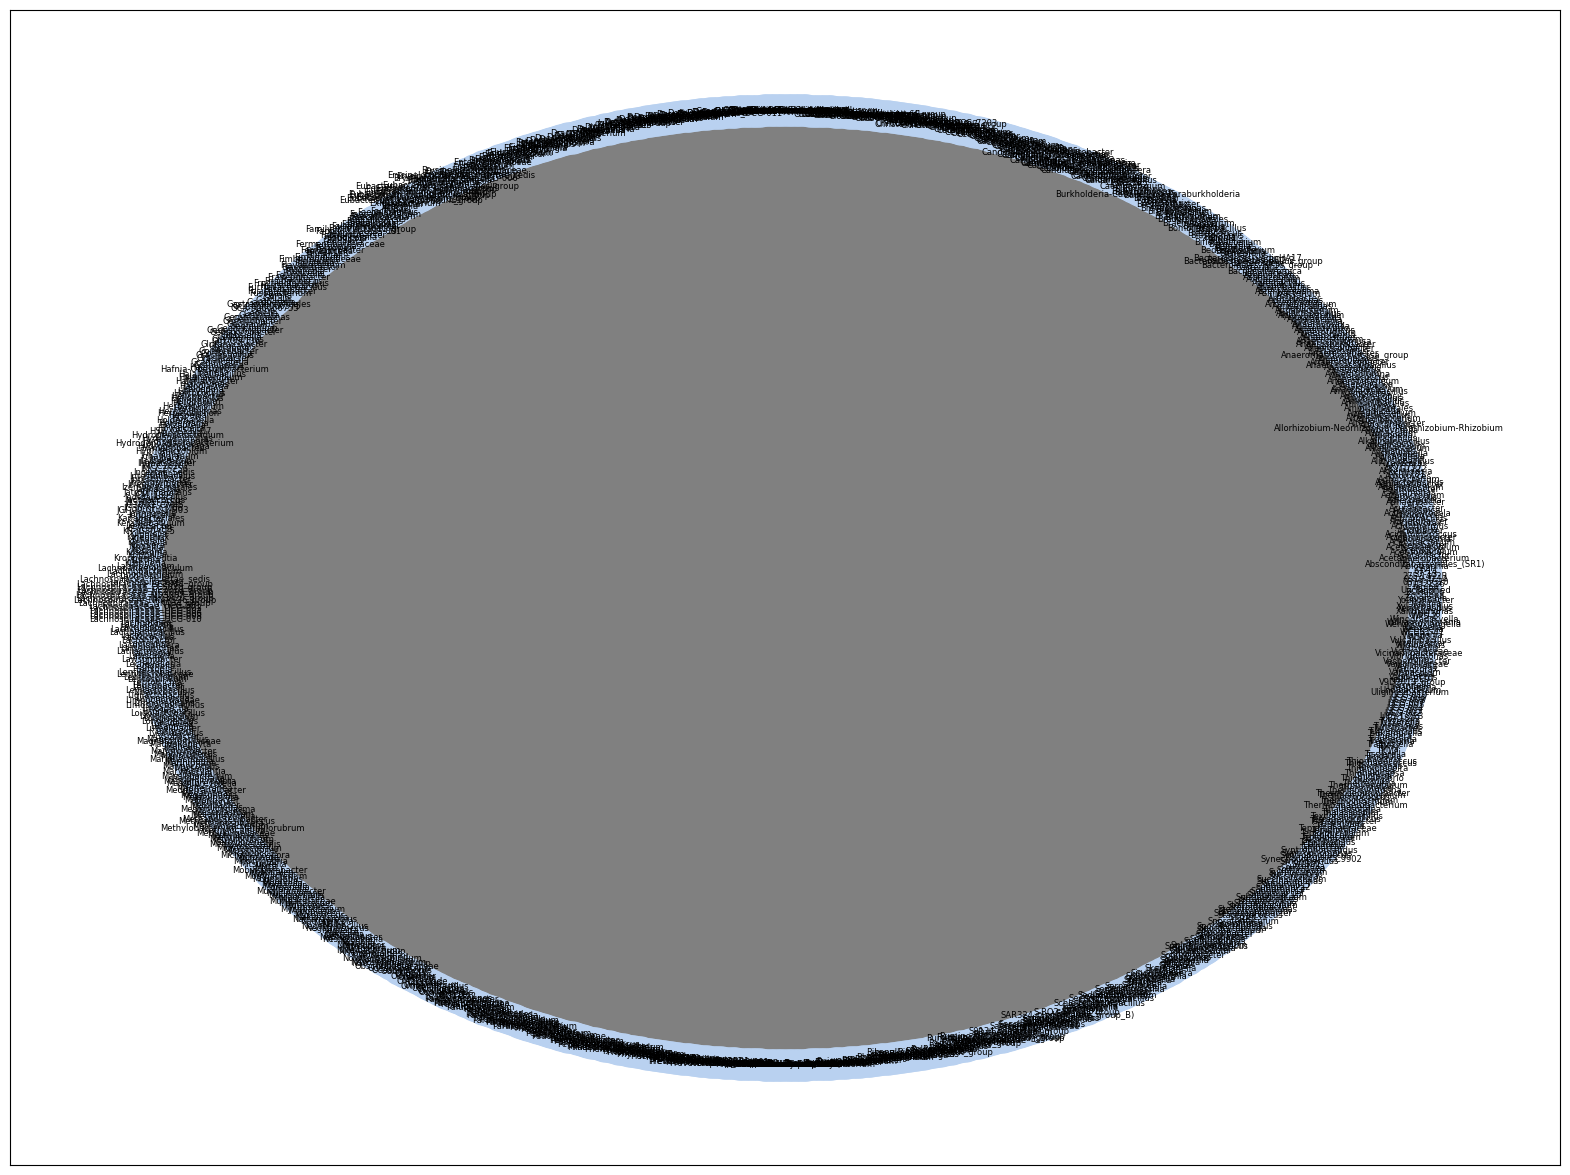

In [175]:
graph_networkx(pcos_adj, list(pcos.columns), 'spearman_PCOS')

In [176]:
spearman_hc_ouralg = run_ouralg(hc_adj, hc, list(hc.columns), fisherz)
graph_networkx(spearman_hc_ouralg, list(hc.columns), 'spearman_hc_ouralg')

/opt/anaconda3/envs/capstone/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/capstone/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


KeyboardInterrupt: 

In [159]:
spearman_pcos_ouralg = run_ouralg(pcos_adj, pcos, list(pcos.columns), fisherz)
graph_networkx(spearman_pcos_ouralg, list(pcos.columns), 'spearman_pcos_ouralg')

ValueError: Data correlation matrix is singular. Cannot run fisherz test. Please check your data.

## SparCC

In [405]:
sparcc_hc = pd.read_csv("sparcc_pcos_screened.csv")
sparcc_hc

Unnamed: 0      genus_A            genus_B       rho     p
0              0       region         study_site  0.255182  0.00
1              1       region      Aeromicrobium  0.036890  0.01
2              2       region          Alistipes -0.089023  0.00
3              3       region       Anaerococcus -0.096328  0.00
4              4       region  Anaerosporobacter -0.031772  0.00
...          ...          ...                ...       ...   ...
5484        5484      UCG-003       Unclassified  0.029137  0.02
5485        5485      UCG-004            UCG-005  0.026365  0.05
5486        5486      UCG-005        Varibaculum -0.022750  0.03
5487        5487      UCG-005       Unclassified  0.058195  0.00
5488        5488  Varibaculum       Unclassified -0.042253  0.00

[5489 rows x 5 columns]

In [397]:
len(np.unique(np.concatenate((sparcc_hc['genus_A'].unique(),  sparcc_hc['genus_B'].unique()))))

276

In [404]:
hc = pd.read_csv('../data/hc.csv', index_col=0)
hc

region  study_site  Acetatifactor  Acetivibrio  Acidaminococcus  \
SRR4457864        0           1            0.0          0.0              0.0   
SRR4457873        0           1            0.0          0.0              0.0   
SRR4457876        0           1            0.0          0.0              0.0   
SRR4457877        0           1            0.0          0.0              0.0   
SRR4457878        0           1            0.0          0.0              0.0   
...             ...         ...            ...          ...              ...   
SRR24874411       1          14            0.0          0.0              0.0   
SRR24874412       1          14            0.0          0.0              0.0   
SRR24874413       1          14            0.0          0.0              0.0   
SRR24874414       1          14            0.0          0.0              0.0   
SRR24874415       1          14            0.0          0.0              0.0   

             Acinetobacter  Actinomyces  Acutalibacter  Adlercreutzia  \
SRR4457864        0.000000     0.026594            0.0       0.033847   
SRR4457873        0.000000     0.016925            0.0       0.000000   
SRR4457876        0.000000     0.000000            0.0       0.000000   
SRR4457877        0.000000     0.019861            0.0       0.000000   
SRR4457878        0.000000     0.037431            0.0       0.034935   
...                    ...          ...            ...            ...   
SRR24874411       0.000000     0.449171            0.0       0.000000   
SRR24874412       0.000000     0.219071            0.0       0.000000   
SRR24874413       0.000000     0.080953            0.0       0.040477   
SRR24874414       0.025611     1.265607            0.0       0.044819   
SRR24874415       0.000000     0.184946            0.0       0.022283   

             Aeromicrobium  ...   UCG-003  UCG-004   UCG-005   UCG-009  \
SRR4457864             0.0  ...  0.055605      0.0  0.834079  0.000000   
SRR4457873             0.0  ...  0.198259      0.0  0.041103  0.000000   
SRR4457876             0.0  ...  0.192395      0.0  0.033523  0.000000   
SRR4457877             0.0  ...  0.465969      0.0  0.200137  0.000000   
SRR4457878             0.0  ...  0.416729      0.0  1.766732  0.064880   
...                    ...  ...       ...      ...       ...       ...   
SRR24874411            0.0  ...  0.000000      0.0  0.000000  0.000000   
SRR24874412            0.0  ...  0.088237      0.0  0.660257  0.000000   
SRR24874413            0.0  ...  0.000000      0.0  0.880366  0.015179   
SRR24874414            0.0  ...  0.055490      0.0  0.565575  0.012805   
SRR24874415            0.0  ...  0.187174      0.0  0.989349  0.004457   

              UCG-010  Varibaculum  Veillonella  Weissella  Xanthomonas  \
SRR4457864   0.000000          0.0     0.000000        0.0          0.0   
SRR4457873   0.009671          0.0     0.043520        0.0          0.0   
SRR4457876   0.000000          0.0     0.119518        0.0          0.0   
SRR4457877   0.000000          0.0     0.000000        0.0          0.0   
SRR4457878   0.137246          0.0     0.000000        0.0          0.0   
...               ...          ...          ...        ...          ...   
SRR24874411  0.000000          0.0     0.183858        0.0          0.0   
SRR24874412  0.015213          0.0     0.000000        0.0          0.0   
SRR24874413  0.877837          0.0     0.070834        0.0          0.0   
SRR24874414  0.000000          0.0     0.021342        0.0          0.0   
SRR24874415  0.271848          0.0     0.120326        0.0          0.0   

             Unclassified  
SRR4457864       3.640935  
SRR4457873       7.630561  
SRR4457876       7.448002  
SRR4457877       6.459400  
SRR4457878       7.031991  
...                   ...  
SRR24874411      3.460715  
SRR24874412      2.002069  
SRR24874413      2.570265  
SRR24874414      1.438480  
SRR24874415      3.901689  

[435 rows x 276 columns]

In [344]:
GLASSO_hc

genus_A                                     genus_B  \
0                       01D2Z36                  Prevotellaceae_Ga6A1_group   
1                Acetitomaculum  Burkholderia-Caballeronia-Paraburkholderia   
2                 Agathobaculum             Bacteroides_pectinophilus_group   
3                 Agathobaculum  Burkholderia-Caballeronia-Paraburkholderia   
4                 Agathobaculum                                      Phocea   
..                          ...                                         ...   
163  Prevotellaceae_Ga6A1_group                                     UCG-007   
164  Prevotellaceae_Ga6A1_group                                  study_site   
165                  Roseateles                                  study_site   
166                  Roseivirga                                     UCG-003   
167                 Subgroup_10                                     UCG-003   

     precision  
0     0.000242  
1    -0.005015  
2     0.000353  
3     0.001038  
4     0.000047  
..         ...  
163   0.000490  
164   0.001965  
165  -0.002409  
166   0.000506  
167  -0.001381  

[168 rows x 3 columns]

In [345]:
GLASSO_pcos

genus_A                          genus_B  precision
0                Actinobacillus                        Aeromonas  -0.003206
1                Actinobacillus                      Duncaniella  -0.002891
2                     Aeromonas                    Agathobaculum   0.000852
3                     Aeromonas  Bacteroides_pectinophilus_group   0.001671
4                     Aeromonas                        Bilophila   0.000954
..                          ...                              ...        ...
166  Prevotellaceae_Ga6A1_group                     Streptomyces   0.000181
167  Prevotellaceae_Ga6A1_group                      Subgroup_10   0.002260
168  Prevotellaceae_Ga6A1_group                            SWB02  -0.001857
169  Prevotellaceae_Ga6A1_group                          UCG-003   0.000738
170  Prevotellaceae_Ga6A1_group                       study_site   0.003541

[171 rows x 3 columns]

In [371]:
# remember to use the smaller datasets, hc_short and pcos_short
glasso_hc_adj = np.full((hc_short.shape[1], hc_short.shape[1]), 0)
glasso_pcos_adj = np.full((pcos_short.shape[1], pcos_short.shape[1]), 0)

print('-----HC-----')
for i, genus_A in enumerate(hc_short.columns):
    print(genus_A)
    for j, genus_B in enumerate(hc_short.columns):
        if any((GLASSO_hc['genus_A'] == genus_A) & (GLASSO_hc['genus_B'] == genus_B)):
            glasso_hc_adj[i, j] = 1

print('-----PCOS-----')
for i, genus_A in enumerate(pcos_short.columns):
    print(genus_A)
    for j, genus_B in enumerate(pcos_short.columns):
        if any((GLASSO_pcos['genus_A'] == genus_A) & (GLASSO_pcos['genus_B'] == genus_B)):
            glasso_pcos_adj[i, j] = 1

-----HC-----
01D2Z36
Acetitomaculum
Agathobaculum
Alkalibacterium
Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium
Anaerocolumna
Anaerotaenia
Bacteroides_pectinophilus_group
Bilophila
Blfdi19
Burkholderia-Caballeronia-Paraburkholderia
C0119
Candidatus_Alysiosphaera
Catenisphaera
Chroococcidiopsis_PCC_7203
Clostridia_vadinBB60_group
Colwellia
Corallococcus
Cryptanaerobacter
Dickeya
Duodenibacillus
Erysipelotrichaceae_UCG-006
Ethanoligenens
Eubacterium_eligens_group
Eubacterium_fissicatena_group
Eubacterium_nodatum_group
Eubacterium_siraeum_group
Faecalibaculum
Fermentibacteraceae
Flavitalea
Fusobacterium
Gemmobacter
Herminiimonas
Holdemania
Inquilinus
Kingella
Lachnospira
Lachnospiracea_incertae_sedis
Lachnospiraceae_NK4B4_group
Lactococcus
Limnochorda
Megasphaera
Mixta
Moorella
Muribaculum
Paraburkholderia
Parvibacter
Peptostreptococcus
Phaselicystis
Phocea
Poseidonibacter
Prevotellaceae_Ga6A1_group
Pseudoalteromonas
Risungbinella
Roseateles
Roseivirga
Ruminococcus2
Ruminococcus_gauv

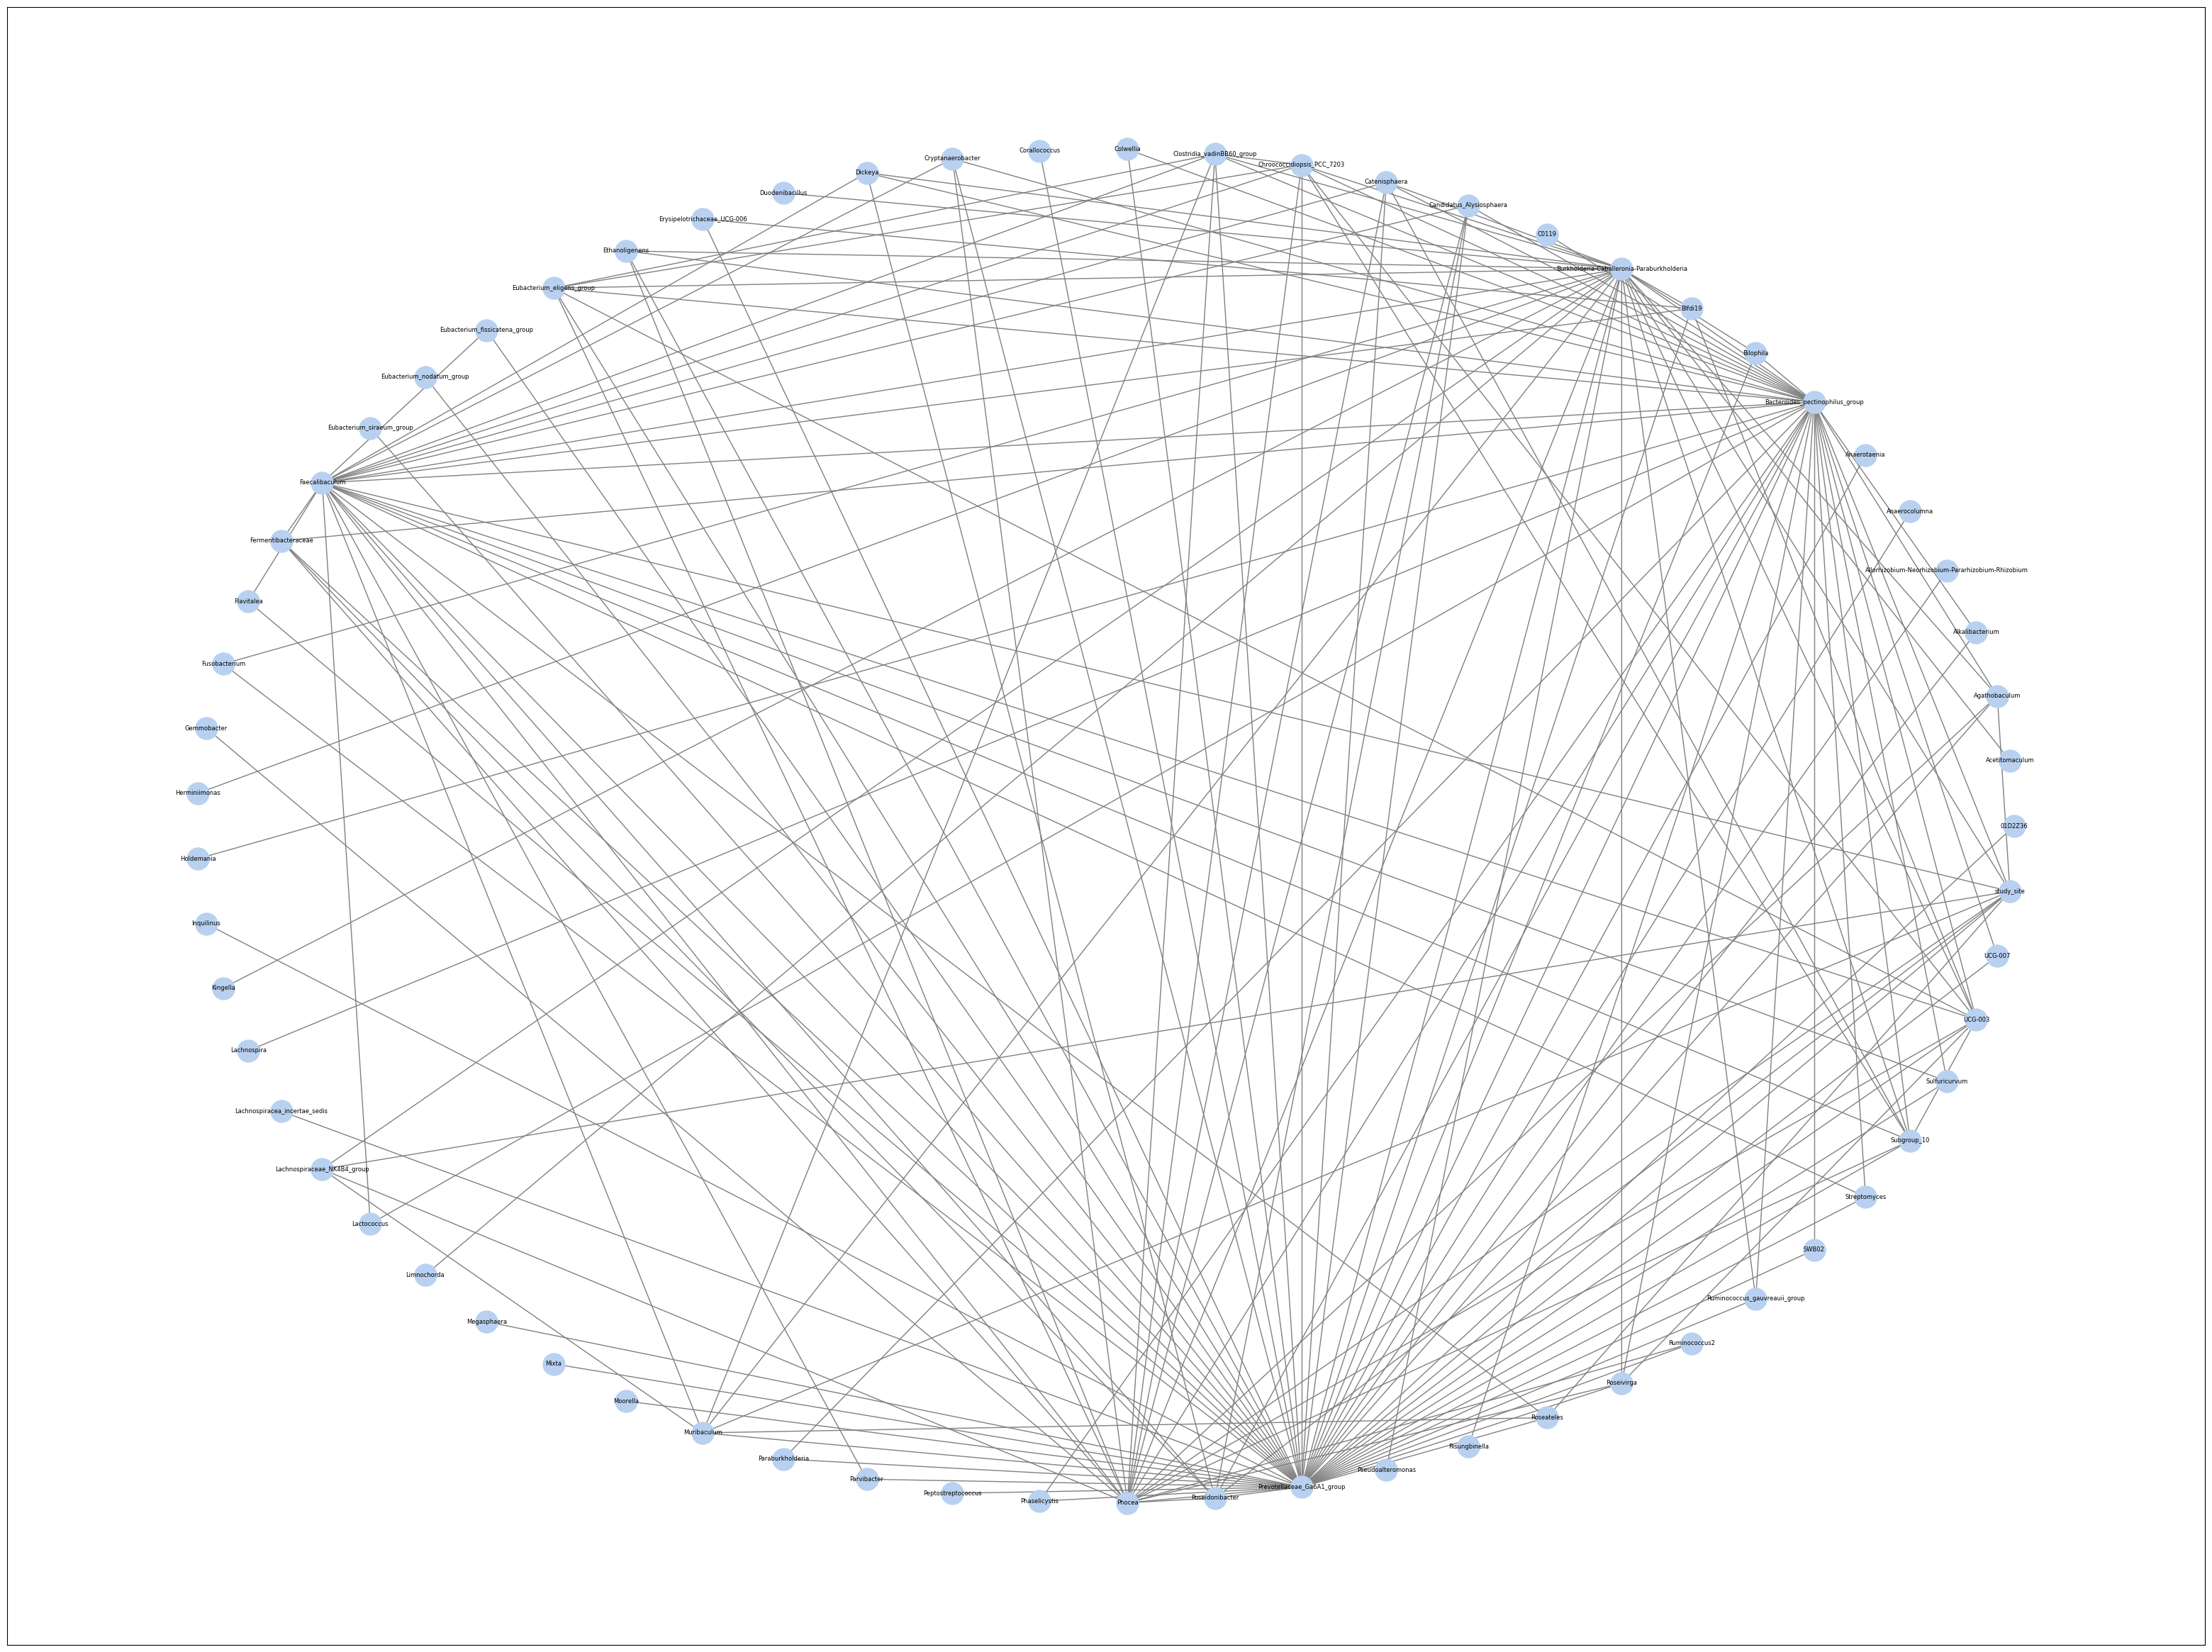

In [407]:
graph_networkx(glasso_hc_adj, list(hc_short.columns), 'glasso_HC')

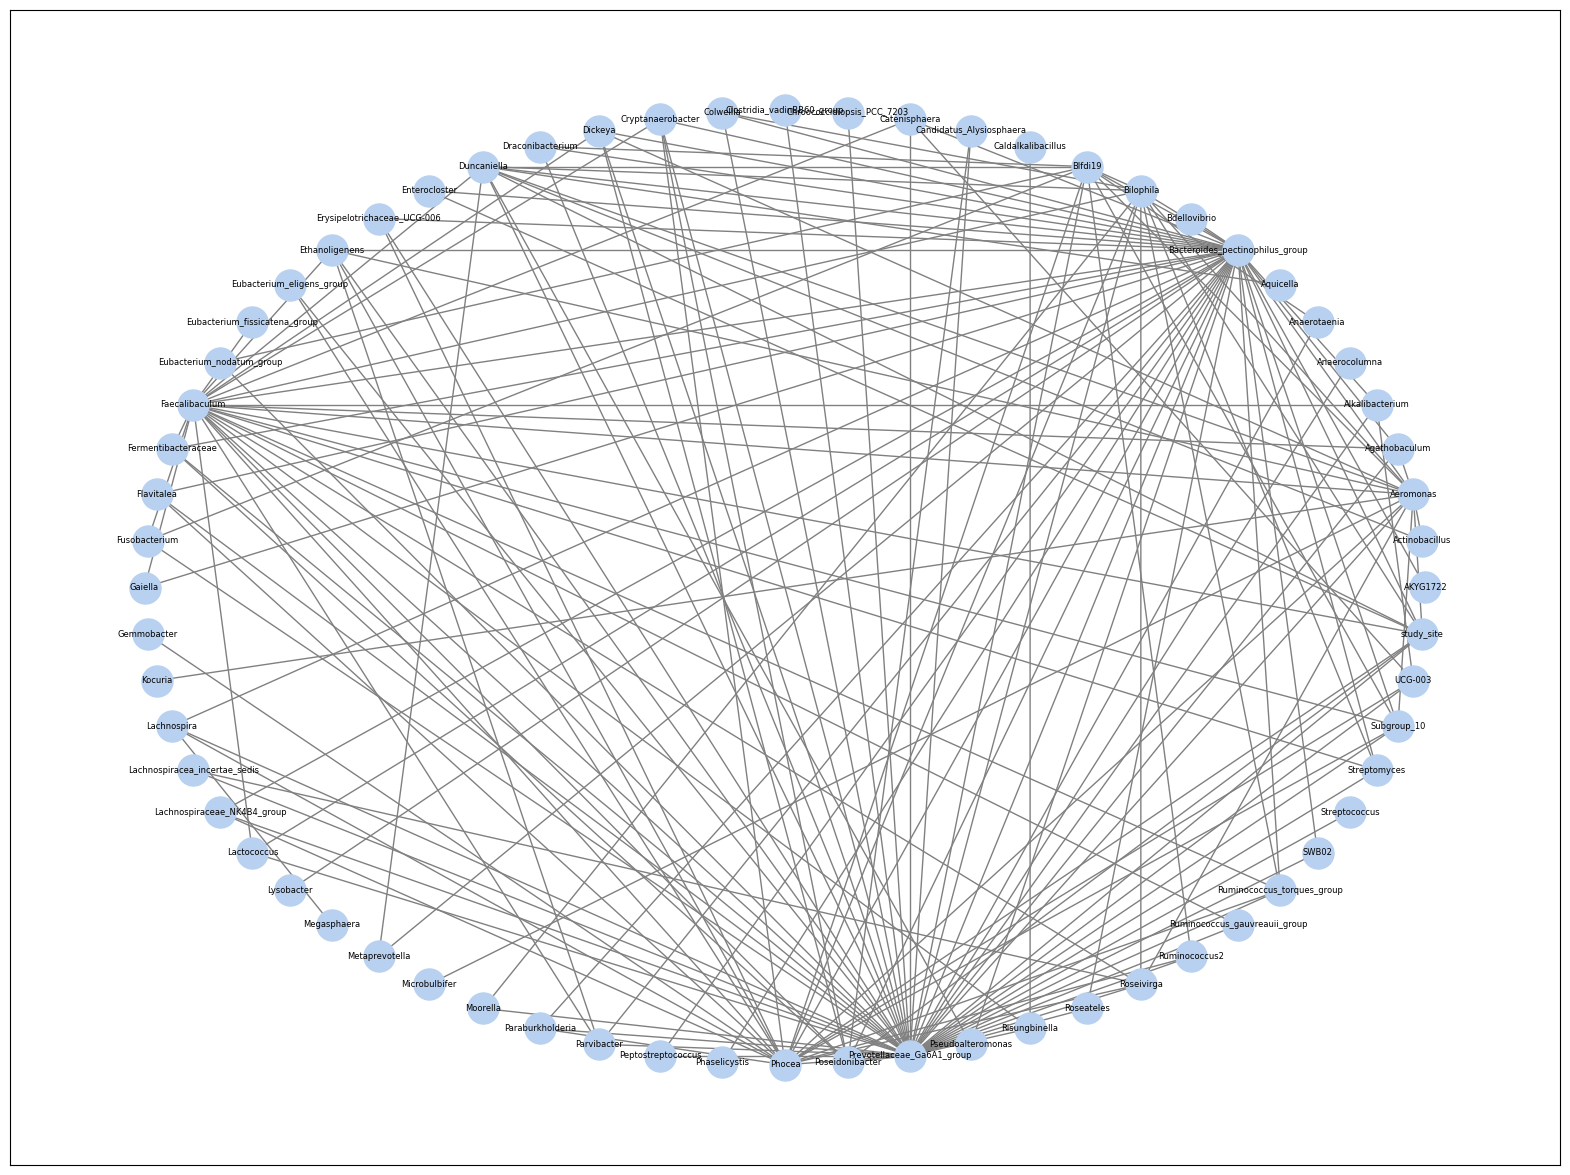

In [348]:
graph_networkx(glasso_pcos_adj, list(pcos_short.columns), 'glasso_PCOS')

In [355]:
glasso_pcos_adj = glasso_pcos_adj + np.eye(pcos_short.shape[1])

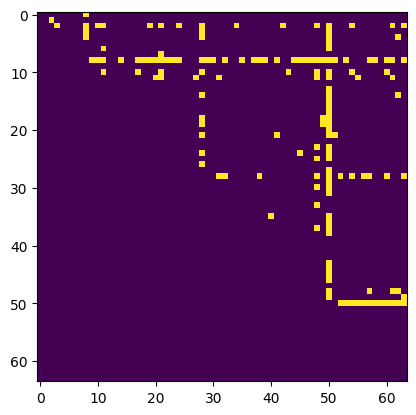

In [379]:
plt.imshow(glasso_pcos_adj)

In [373]:
np.linalg.det(glasso_pcos_adj)

np.float64(0.0)

In [374]:
glasso_pcos_adj.sum()

np.int64(171)

In [380]:
glasso_pcos_ouralg.sum() / 2

np.float64(151.0)

0 51 [1]
0 51 [2]
0 51 [3]
0 51 [4]
0 51 [5]
0 51 [6]
0 51 [7]
0 51 [8]
0 51 [9]
0 51 [10]
0 51 [11]
0 51 [12]
0 51 [13]
0 51 [14]
0 51 [15]
0 51 [16]
0 51 [17]
0 51 [18]
0 51 [19]
0 51 [20]
0 51 [21]
0 51 [22]
0 51 [23]
0 51 [24]
0 51 [25]
0 51 [26]
0 51 [27]
0 51 [28]
0 51 [29]
0 51 [30]
0 51 [31]
0 51 [32]
0 51 [33]
0 51 [34]
0 51 [35]
0 51 [36]
0 51 [37]
0 51 [38]
0 51 [39]
0 51 [40]
0 51 [41]
0 51 [42]
0 51 [43]
0 51 [44]
0 51 [45]
0 51 [46]
0 51 [47]
0 51 [48]
0 51 [49]
0 51 [50]
0 51 [52]
0 51 [53]
0 51 [54]
0 51 [55]
0 51 [56]
0 51 [57]
0 51 [58]
0 51 [59]
0 51 [60]
0 51 [61]
0 51 [62]
0 51 [63]
0 51 [64]
1 10 [0]
1 10 [2]
1 10 [3]
1 10 [4]
1 10 [5]
1 10 [6]
1 10 [7]
1 10 [8]
1 10 [9]
1 10 [11]
1 10 [12]
1 10 [13]
1 10 [14]
1 10 [15]
1 10 [16]
1 10 [17]
1 10 [18]
1 10 [19]
1 10 [20]
1 10 [21]
1 10 [22]
1 10 [23]
1 10 [24]
1 10 [25]
1 10 [26]
1 10 [27]
1 10 [28]
1 10 [29]
1 10 [30]
1 10 [31]
1 10 [32]
1 10 [33]
1 10 [34]
1 10 [35]
1 10 [36]
1 10 [37]
1 10 [38]
1 10 [39]
1 10 [40

/opt/anaconda3/envs/capstone/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/capstone/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


3 7 [20]
3 7 [21]
3 7 [22]
3 7 [23]
3 7 [24]
3 7 [25]
3 7 [26]
3 7 [27]
3 7 [28]
3 7 [29]
3 7 [30]
3 7 [31]
3 7 [32]
3 7 [33]
3 7 [34]
3 7 [35]
3 7 [36]
3 7 [37]
3 7 [38]
3 7 [39]
3 7 [40]
3 7 [41]
3 7 [42]
3 7 [43]
3 7 [44]
3 7 [45]
3 7 [46]
3 7 [47]
3 7 [48]
3 7 [49]
3 7 [50]
3 7 [51]
3 7 [52]
3 7 [53]
3 7 [54]
3 7 [55]
3 7 [56]
3 7 [57]
3 7 [58]
3 7 [59]
3 7 [60]
3 7 [61]
3 7 [62]
3 7 [63]
3 7 [64]
3 51 [0]
3 51 [1]
3 51 [2]
3 51 [4]
3 51 [5]
3 51 [6]
3 51 [7]
3 51 [8]
3 51 [9]
3 51 [10]
3 51 [11]
3 51 [12]
3 51 [13]
3 51 [14]
3 51 [15]
3 51 [16]
3 51 [17]
3 51 [18]
3 51 [19]
3 51 [20]
3 51 [21]
3 51 [22]
3 51 [23]
3 51 [24]
3 51 [25]
3 51 [26]
3 51 [27]
3 51 [28]
3 51 [29]
3 51 [30]
3 51 [31]
3 51 [32]
3 51 [33]
3 51 [34]
3 51 [35]
3 51 [36]
3 51 [37]
3 51 [38]
3 51 [39]
3 51 [40]
3 51 [41]
3 51 [42]
3 51 [43]
3 51 [44]
3 51 [45]
3 51 [46]
3 51 [47]
3 51 [48]
3 51 [49]
3 51 [50]
3 51 [52]
3 51 [53]
3 51 [54]
3 51 [55]
3 51 [56]
3 51 [57]
3 51 [58]
3 51 [59]
3 51 [60]
3 51 [61]
3 51

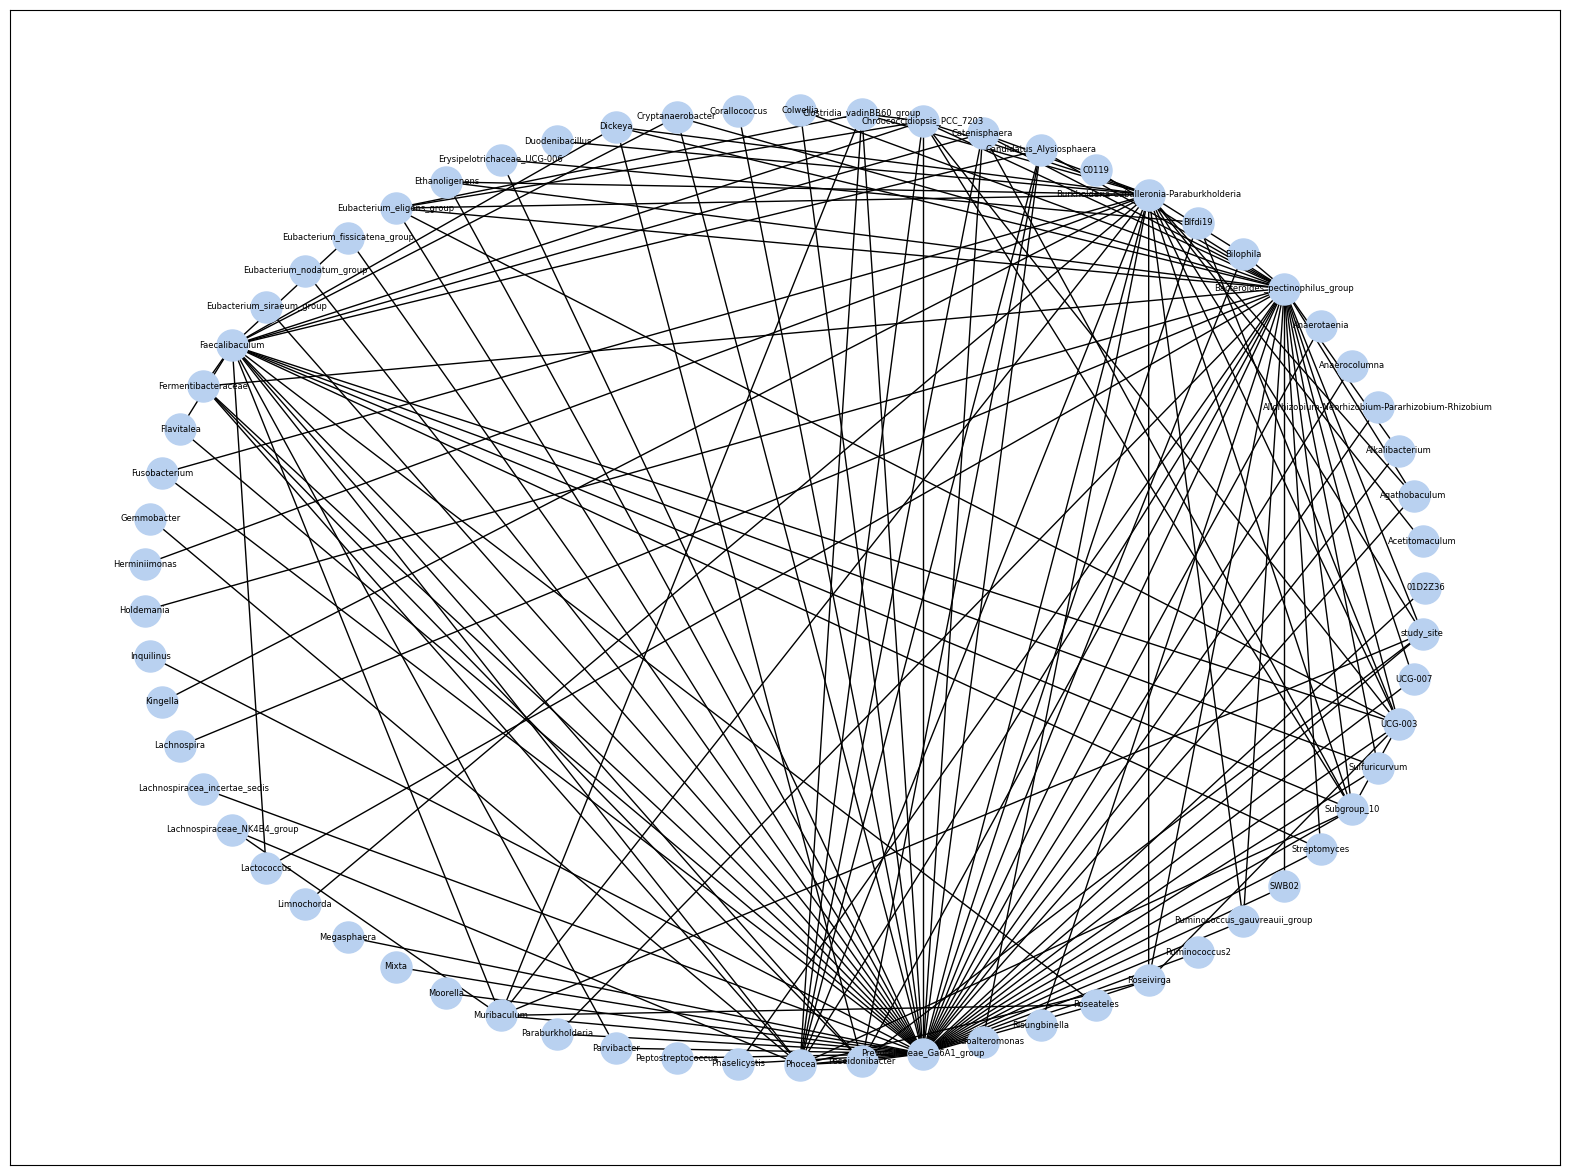

In [333]:
glasso_hc_ouralg = run_ouralg(glasso_hc_adj, hc_short, list(hc_short.columns), fisherz)
graph_networkx(glasso_hc_ouralg, list(hc_short.columns), 'glasso_hc_ouralg')

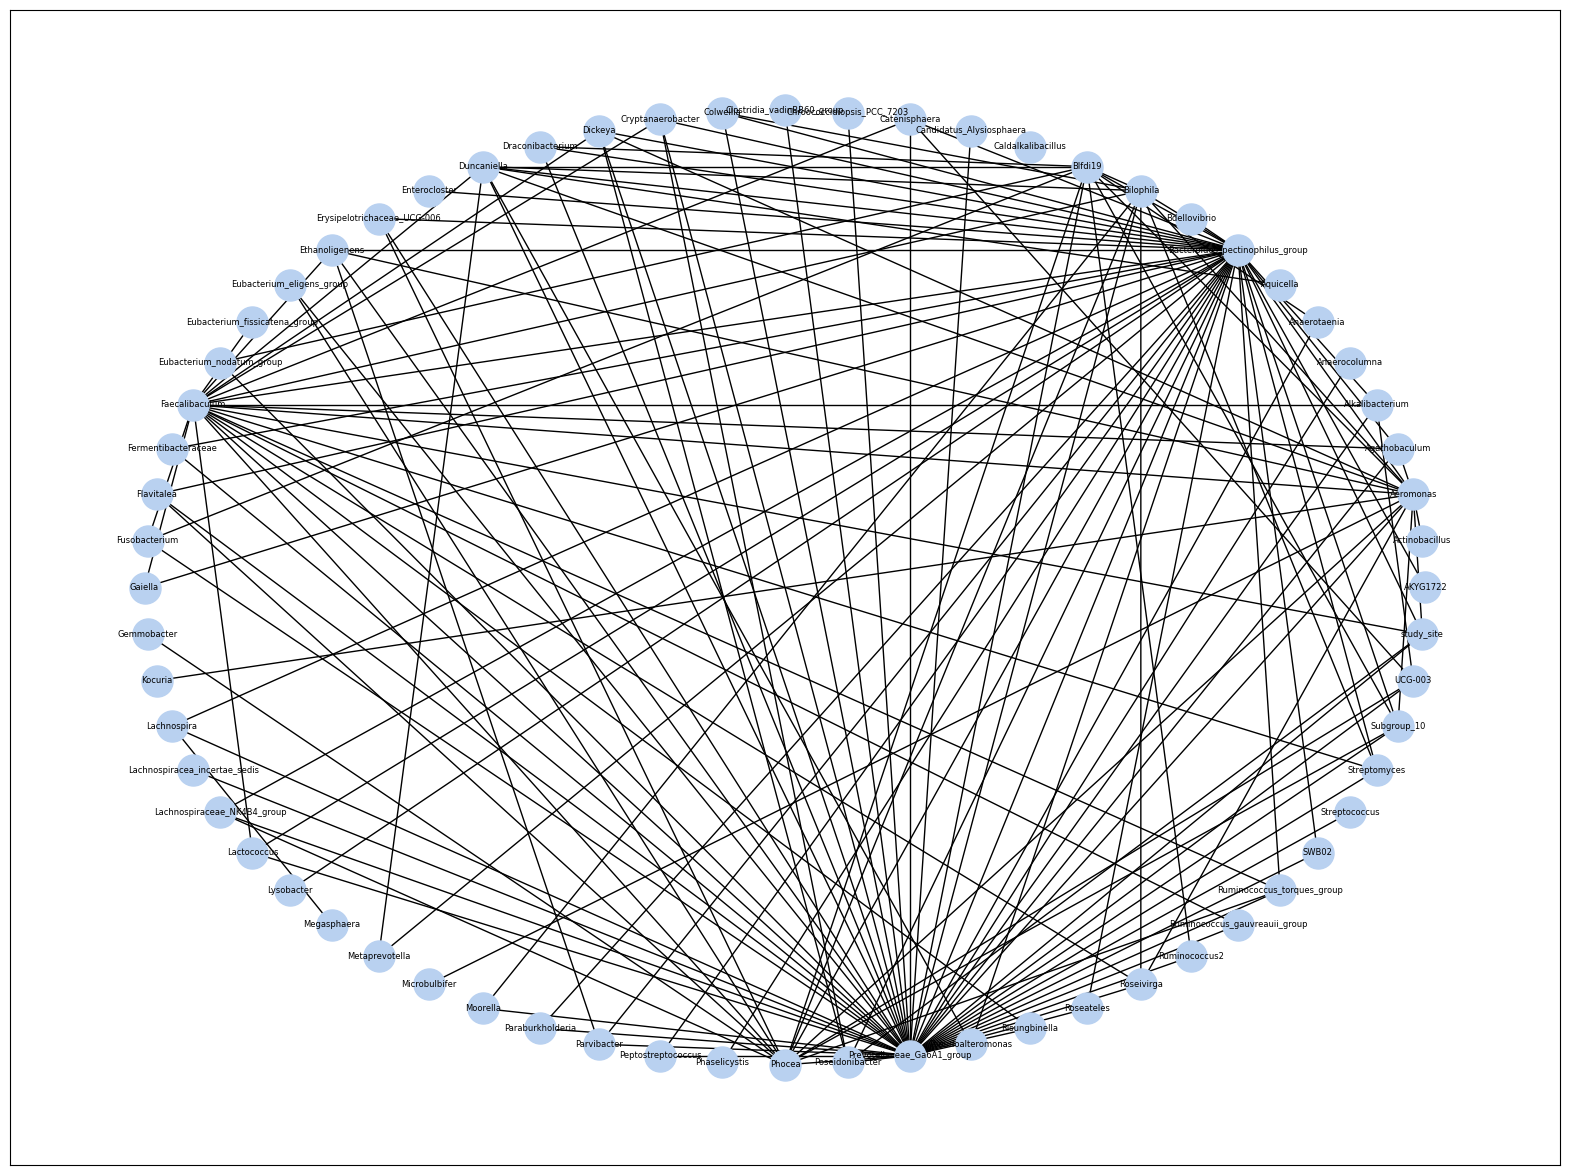

In [381]:
glasso_pcos_ouralg = run_ouralg(glasso_pcos_adj, pcos_short, list(pcos_short.columns), fisherz)
graph_networkx(glasso_pcos_ouralg, list(pcos_short.columns), 'glasso_pcos_ouralg')

In [406]:
def fisherz(genus_A, genus_B, genus_C, data):
    '''
    Run the Fisher Z (conditional) independence test between genus_A and genus_B conditioned on genus_c.

    :param: genus_A: index of the first genus to test independence
    :param: genus_B: index of the second genus to test independence
    :param: genus_C: index/list of index of the conditioning set
    :param: data: data containing the genus values
    '''
    fisherz_obj = CIT(data.values, "fisherz")
    pValue = fisherz_obj(genus_A, genus_B, genus_C)
    return pValue


def run_ouralg(adj_matrix, data, genus_lst, indep_test):
    '''
    Run our algorithm on the data and save the plot of the resulting causal graph. The methodology can be found in the associated paper. Returns the resulting adjacency matrix.

    :param: adj_matrix: adjacency matrix of the correlation graph from the paper
    :param: data: data for the corresponding cohort
    :param: genus_lst: list of genus corresponding to the adjacency matrix as node labels
    :param: indep_test: choice of independence test

    :return: the updated adjacency matrix
    '''
    adj_df = pd.DataFrame(adj_matrix, columns=genus_lst, index=genus_lst)

    
    def create_tuples(genus_lst, genus_A, genus_B):
        '''
        Creates tuples of 2 combinations for all items in genus_lst except genus_a and genus_b.
        
        :param: genus_lst: list of genus names
        :param: genus_A: index of the first genus to exclude
        :param: genus_B: index of the second genus to exclude
    
        :return: list of tuples, where each tuple contains two distinct genus names from genus_lst, excluding genus_a and genus_b.
        '''
        filtered_genus_lst = [x for x in range(len(genus_lst)) if (x != genus_A) and (x != genus_B)]
        combinations = list(itertools.combinations(filtered_genus_lst, 2))
        
        return combinations
        
    
    removed_edges = {}

    for i in range(len(genus_lst)):
        for j in range(len(genus_lst)):
            if adj_df.iloc[i, j] == 1.0:
                genus_A = i
                genus_B = j
                for k in range(len(genus_lst)):
                    if k != i and k != j:
                        genus_C = [k]
                        try: 
                            p_value = indep_test(genus_A, genus_B, genus_C, data)
                        except:
                            p_value = 1
    
                        if p_value < 0.05: # no multiple testing correction
                            adj_df.iloc[i, j] = 0
                            removed_edges[(i, j)] = [genus_C]
                            break
    
    for i in range(len(genus_lst)):
        for j in range(len(genus_lst)):
            if adj_df.iloc[i, j] == 1.0:
                genus_A = i
                genus_B = j
                combinations = create_tuples(genus_lst, genus_A, genus_B)
    
                for k in combinations:
                    genus_C = k
                    try :
                        p_value = indep_test(genus_A, genus_B, list(genus_C), data)
                    except:
                        p_value = 1
    
                    if p_value < 0.05:
                        adj_df.iloc[i, j] = 0
                        removed_edges[(i, j)] = [genus_C]
                        break
                    else:
                        adj_df.iloc[i, j] = 2
                        
    return adj_df.values

def graph_networkx(adj_matrix, genus_lst, fp):
    '''
    Create a NetworkX graph of the adjacency matrix and corresponding genus as node labels. Currently uses the circular layout for optimal viewing.

    :param: adj_matrix: adjacency matrix of size 45 x 45 of the genus to genus correlations
    :param: genus_lst: list of genus corresponding to the adjacency matrix as node labels
    '''
    if 1 in np.unique(adj_matrix):
        edge_val = 1
        edge_color = "gray"

    if 2 in np.unique(adj_matrix):
        edge_val = 2
        edge_color = "black"
        
    rows, cols = np.where(adj_matrix == edge_val)
    edges = zip(rows.tolist(), cols.tolist())
    edges = zip(rows.tolist(), cols.tolist())
    edge_list = list(edges)
    graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}
    
    plt.figure(figsize=(40,30))
    G = nx.Graph()
    G.add_nodes_from(range(len(genus_lst)))
    G.add_edges_from(edge_list)
    pos_spaced = nx.circular_layout(G)
    nx.draw_networkx(G, pos_spaced, node_size=500, font_size=6, labels=graph_labels, with_labels=True, edge_color=edge_color, node_color="#b9d1f0")
    plt.savefig(f"{fp}.png")


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=12)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels, fontsize=12)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, fontsize=12)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


def build_adjacency_matrix_heatmap_of_edges(IR_graph, IS_graph, genera, alg, fp):
    """
    Given the two IR and IS causal graphs, overlay the two and plot their comparative edges. 

    :param: IR_graph: causallearn CausalGraph object for the IR cohort
    :param: IS_graph: causallearn CausalGraph object for the IS cohort
    :param: genera: list of genera in the same order of the columns of the graphs
    :param: alg: string of algorithm type from the following list, ["pc", "fci", "ges", "ouralg"]
    :param: fp: filepath name of resulting heatmap
    """
    if alg == "ouralg":
        IR_adjmat = IR_graph
        IS_adjmat = IS_graph

    overlay = np.zeros(IR_adjmat.shape)
    overlay_directed = np.zeros(IR_adjmat.shape)

    for i in range(len(genera)):
        for j in range(len(genera)):
            IR_ij = IR_adjmat[i, j]
            IR_ji = IR_adjmat[j, i]
            IS_ij = IS_adjmat[i, j]
            IS_ji = IS_adjmat[j, i]

            # our algorithm edges
            if alg == "ouralg":
                if IR_ij == 2 and IS_ij == 2:
                    overlay[i, j] = 3
                elif IR_ij == 0 and IS_ij == 2:
                    overlay[i, j] = 2
                elif IR_ij == 2 and IS_ij == 0:
                    overlay[i, j] = 1
                else:
                    overlay[i, j] = 0 
                    
            # IS only
            elif (IR_ij == 0 and IR_ji == 0 and IS_ij == 1):
                overlay[i, j] = 2
                if IS_ji == tail:
                    overlay_directed[i, j] = 1
                if alg == "fci":
                    if IS_ji == circle:
                        overlay_directed[i, j] = 1
                    if IS_ji == 1:
                        overlay_directed[i, j] = 3

            # IR only
            elif (IR_ij == 1 and IS_ij == 0 and IS_ji == 0):
                overlay[i, j] = 1
                if IR_ji == tail:
                    overlay_directed[i, j] = 1
                if alg == "fci": 
                    if IR_ji == circle:
                        overlay_directed[i, j] = 1
                    if IR_ji == 1:
                        overlay_directed[i, j] = 3
                    
            # no edges (universal)
            else:
                overlay[i, j] = 0
                overlay_directed[i, j] = 0

    fig, ax = plt.subplots(figsize=(15, 15))

    edge_comp = ["None", "PCOS only", "HC only", "both", "direction contradiction"]
    norm = matplotlib.colors.BoundaryNorm(np.linspace(-0.5, 4.5, 6), 5)
    fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: edge_comp[norm(x)])
    
    upper_tri_mask = np.tri(45, 45, k=-1).T
    
    cmap = ListedColormap(["#d3d5d3", "#217786", "#e39a33", "#567119", "#ec061d"])

    # np.ma.array(overlay, mask=upper_tri_mask).T
    if alg != "ouralg":
        overlay = overlay.T
        overlay_directed = overlay_directed.T
    im, _ = heatmap(overlay, genera, genera, ax=ax, 
                    cmap=cmap, norm=norm, 
                    cbar_kw=dict(ticks=np.arange(0, 5), format=fmt, fraction=0.046, pad=0.04), cbarlabel="Edge Comparison")
    
    def func(x, pos):
        if x == 1:
            return "▶"
        elif x == 2:
            return "●"
        elif x == 3:
            return "C"
        elif x == 4:
            return "C●"
        else:
            return ""

    # np.ma.array(overlay_directed, mask=upper_tri_mask).T
    annotate_heatmap(im, data=overlay_directed, valfmt=matplotlib.ticker.FuncFormatter(func), threshold=0)
    
    plt.tight_layout()
    plt.savefig(f"{fp}.png")
    plt.show()

    return